In [12]:
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import norm

j = complex(0,1)

In [102]:
scl = 1

def func(x, y):
    X = x
    Y = y
    
    R = 0.1*np.sqrt(X**2+Y**2)
    return np.heaviside(R, 1) - np.heaviside(R-4, -1)

x0 = -512
dx = 1
x=np.arange(x0,-x0,dx)
y0 = -512
dy = scl
y=np.arange(y0,-y0,dy)

In [103]:
X, Y = np.meshgrid(x,y)
nonfour = func(X, Y)

<IPython.core.display.Javascript object>


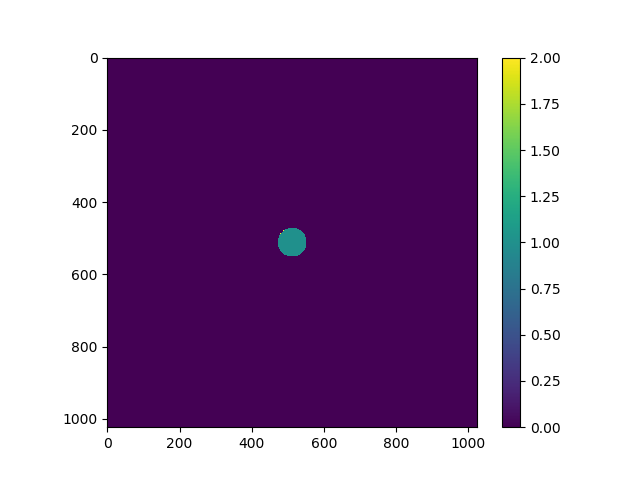

In [104]:
fig = plt.figure()
plt.imshow(nonfour)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


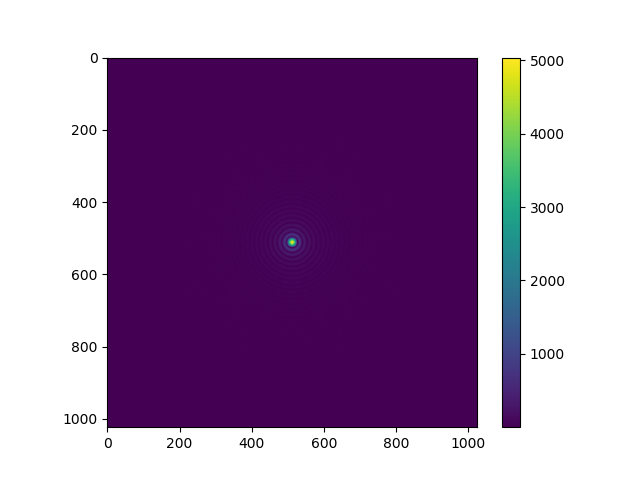

In [106]:
fig = plt.figure()
g=np.fft.fft2(nonfour)
G = np.fft.fftshift( g )

plt.imshow(np.abs(G))
#plt.xlim([512-30,512+30])
#plt.ylim([512-30,512+30])
plt.colorbar()
plt.show()